In [1]:
import numpy as np
import random
import math
from matplotlib import pyplot as plt

from pso import PSO
from gsa import GSA
from abc_py import ABC
from benchmark import F6 as test

''' Constant variable '''

######## Global variable #########
RUNS = 1
AGENT_NUM = 50
ITER_KINDS = 2
ALGO = 3
ITER = [500, 2500]
RESULTS = np.zeros((ALGO, RUNS, ITER_KINDS, ITER[1]))                   # Store all the result for the whole runs
AVERAGE_RESULT = np.zeros((ALGO, ITER_KINDS, ITER[1]))                   # Store all the result for the whole runs

##################################

######### PSO variable ###########

##################################

######### GSA variable ###########
epsilon = 0
G_0 = 100
ALPHA = 20
K_best = 50
end_thres = 1e-5
##################################

######### ABC variable ###########

##################################

In [2]:
def plot_result():
    x1 = np.arange(0,  500,  1) 
    x2 = np.arange(0,  2500,  1) 
    plt.figure(1)
    # plt.subplot(3,  1,  1)  
    plt.title("ITER 500") 
    plt.xlabel("iter") 
    plt.ylabel("fitness") 
    for i in range(ALGO):
      tmp = AVERAGE_RESULT[i][0].copy()
      tmp.resize(ITER[0])
      plt.plot(x1, tmp) 

    plt.figure(2)
    # plt.subplot(3,  1,  3)  
    plt.title("ITER 2500") 
    plt.xlabel("iter") 
    plt.ylabel("fitness") 
    for i in range(ALGO):
      plt.plot(x2, AVERAGE_RESULT[i][1]) 
    plt.show()

Iteration: 1, best is 703.0
[ 1.13135632  1.49944867  8.52932808 -8.70204021 -1.92387656  4.3257442
 -8.72707803  3.87749435 -1.06889689 -1.7707954   3.26901151  3.47780373
  5.17315484 -3.68591892  2.02526796  2.17371373  4.97329952  3.11157801
  1.13937775  4.76097454  8.48493421  3.1535217   4.26654495  8.64516975
 -2.91339645  3.66812796 -5.68711359  5.07020118 -3.29036023 -5.14278156]
Iteration: 2, best is 703.0
[ -3.63546429   2.42570404   5.61405385 -10.          -1.50990792
  -1.78264859  -8.03913855   4.81117708   0.93949871  -2.7537349
  -0.68254743   4.5984273   -4.51640969  -3.24411493   3.03470794
   1.51071531   2.41538173   3.62538024   3.98628183  -5.26747122
  10.           3.54172327   2.4442847   10.          -3.03262916
   3.89416077  -5.5895311    3.16078362   1.29298219  -1.96622809]
Iteration: 3, best is 692.0
[ -3.97084941   1.43002872   7.56130311  -5.08076479  -1.96018212
  -4.07950106  -7.29551195  -3.25192001  -1.627526    -3.75184606
  -1.08927677   5.53714

[-0.24096575  0.65500793  0.3938604  -1.28026244  0.14011814 -0.00354063
  0.4773653  -0.32063834  0.19015014  0.02110047  0.09268567 -0.36030514
  0.23477626 -0.03500788  0.1843444   0.22024511  0.04473582 -0.32189841
 -0.39687116  0.11916807 -0.0251269  -0.27273026 -0.13935903  0.31904604
 -0.09423836 -0.45767495  0.23914809 -0.15710792 -0.05549148  0.27694086]
Iteration: 172, best is 2.0
[-0.27537436  0.42126165  0.37729242 -0.67676704  0.19269692 -0.46891252
  0.43001051 -0.35308325  0.18994312  0.40849644  0.09581693 -0.32210998
  0.2334632   0.00855293  0.29808858  0.22342888  0.00584869 -0.36896092
 -0.4814706   0.03360638 -0.43126309 -0.27800889 -0.22238421  0.33594773
 -0.00285595 -0.41950569 -0.16897972 -0.18325596  0.30183586  0.25769679]
Iteration: 173, best is 1.0
[-0.27537436  0.42126165  0.37729242 -0.67676704  0.19269692 -0.46891252
  0.43001051 -0.35308325  0.18994312  0.40849644  0.09581693 -0.32210998
  0.2334632   0.00855293  0.29808858  0.22342888  0.00584869 -0.36

[-0.33913624  0.24751224  0.38199237 -0.30062395  0.18225471 -0.39870748
  0.40427837 -0.32506648  0.17917862  0.3253336   0.05554017 -0.32960059
  0.23734212  0.04581652  0.37470496  0.23007565  0.00571063 -0.32381585
 -0.37211236 -0.04233236  0.03669004 -0.27720909 -0.30763441  0.31584282
  0.02485638 -0.40909658  0.1266578  -0.21437396  0.03984668  0.27254212]
Iteration: 390, best is 0.0
[-0.33913624  0.24751224  0.38199237 -0.30062395  0.18225471 -0.39870748
  0.40427837 -0.32506648  0.17917862  0.3253336   0.05554017 -0.32960059
  0.23734212  0.04581652  0.37470496  0.23007565  0.00571063 -0.32381585
 -0.37211236 -0.04233236  0.03669004 -0.27720909 -0.30763441  0.31584282
  0.02485638 -0.40909658  0.1266578  -0.21437396  0.03984668  0.27254212]
Iteration: 391, best is 0.0
[-0.33913624  0.24751224  0.38199237 -0.30062395  0.18225471 -0.39870748
  0.40427837 -0.32506648  0.17917862  0.3253336   0.05554017 -0.32960059
  0.23734212  0.04581652  0.37470496  0.23007565  0.00571063 -0.32

Best:  [-0.06454816 -0.83298548 -1.73026488  2.2422743  -1.99402815  1.3319154
  1.0872663   0.8890638  -1.50251998 -2.12728076  0.27670352  1.79478268
 -0.31036673 -0.52696651 -2.06151438  0.45667359 -0.71408254  1.15495929
 -1.99796737 -0.97772912  0.9659926   0.69218807 -0.16631056 -0.08562251
  1.2941041  -1.24909223  2.46325588  0.97501487  3.08275273  0.37071312] fitness:  58.0
Best:  [ 2.16038318  0.77655402  2.87887955  5.04647176  0.2561016   8.69123085
 -2.14156117  1.07218283 -5.79245369 -1.65780214  1.10683903  0.6606433
  0.48978517  2.77050804 -8.59926287 11.14999    -6.3863567   4.90882299
 -1.10671278 -4.10957461 -4.35109337 -0.18024422  1.95901528 -2.21124094
  0.30452757  7.68585664  9.64898034  0.28774592 -0.38526458 -7.12375018] fitness:  693.0
Best:  [ 0.97741369 -1.1845739  -0.16046478  2.10407436 -0.183498    0.11062178
 -1.29928435  2.71856502  3.15537817  0.58414253  0.55059744  5.45847066
  1.14064927 -2.70907178  0.07629391  2.00748544  0.23667689 -0.02741638

Best:  [-7.85522814e-01 -2.05927596e+00  5.08073372e-01  1.97594686e+00
 -8.04898327e-03 -1.39240843e-01 -2.66202421e-01  1.47951632e+00
  1.66501022e+00  6.59401001e-01  3.12779723e-01 -1.48083762e-01
 -1.07015387e+00 -4.66779580e-02  2.64454121e-01 -4.04915050e-01
 -2.45076243e-01 -5.55013392e-01 -1.73409600e+00  1.72821293e+00
 -1.46848074e+00  8.98187559e-02  2.40185011e-02 -1.24247168e+00
 -9.89217929e-02  8.23403883e+00  3.94478173e-01  8.41763178e-01
 -3.21375247e+00 -5.31312381e-03] fitness:  102.0
Best:  [-2.14423075  0.78329271 -0.36129051  3.05049024  0.14297516  4.50821253
 -2.01596743  0.61325039  1.17597306  2.11348123  1.33253343  0.64610453
 -1.22156068  0.08411021 -5.11815657 -0.47060037  1.03777042  1.13295361
 -2.09548031  1.76699355 -0.70848246  0.70100888 -0.49111345 -0.48009502
 -0.00706915 -0.70564054 -0.08847571 -1.51231077  0.48511693 -1.14040655] fitness:  95.0
Best:  [ 1.19701731 -0.43975835 -0.05824015 -2.51194436  0.051433    0.07726741
 -2.35560766  1.1260

Best:  [ 0.63199567 -0.35327235 -0.27653174 -0.18518642  0.0496308  -0.04514096
 -0.63880863  0.97342439  0.39076451 -0.17581338  0.50166663 -0.12884765
 -0.64703774  0.13461833 -0.07340768  0.82750542 -0.08453386  0.09553294
 -0.65160305  1.94754075 -0.15970335 -0.01008547 -0.09275213  0.03573858
 -0.05784312  0.58319679  0.12113333 -0.69305565 -0.34029991 -0.4536484 ] fitness:  13.0
Best:  [ 1.12720150e+00  6.70299092e-01 -1.15241448e+00 -4.66809712e-01
  1.39811171e-02 -4.40914625e-02  1.93040197e-01  1.66922206e+00
 -1.64841764e-02  1.83122404e-01  7.21096400e-01 -7.88080232e-02
 -7.37971180e-01  1.36191742e-01 -9.30199374e-01  1.00278604e+00
  1.80747092e-01  1.39687333e-01 -3.45690048e-01  2.07680236e+00
 -3.91968571e-01 -4.61030057e-01 -3.43472371e-01 -1.31888481e-01
  5.22260705e-01  4.31022798e-01 -1.85715167e-01 -5.13699472e-01
  1.50850634e-04 -5.66597871e-01] fitness:  18.0
Best:  [ 0.59128482 -1.05500307 -0.8404928  -0.63080193  0.19339587 -0.31486221
 -0.79945268  0.97442

Best:  [ 0.30042301  0.32812756  0.03117691  0.05471759  0.14749234  0.1824257
  0.14164284  0.27104831 -0.35581732 -0.01384361  0.23781744 -0.0568054
  0.01491157 -0.02814968 -0.09418587  0.33001948  0.30400666  0.18402636
  0.16632631  1.20529475 -0.04716884  0.22070704  0.15653365 -0.13925722
  0.00659895  0.23517372 -0.27715457  0.44283694 -0.08823996  0.00958538] fitness:  1.0
Best:  [-0.03211143  0.41394404  0.01303119 -0.74305491  0.65035791  0.20445443
  0.26302904  0.25128046 -0.38564849 -0.06513542 -0.39888256 -0.13372658
  0.01246549  0.17564736  0.17072305  0.46865323  0.05364871  0.14181785
  0.17243162  1.11595388 -0.18707662 -0.3592585   0.32177732 -0.07768156
  0.02189276  0.25357427 -0.16044707  0.53437153  0.02296906  0.26416114] fitness:  4.0
Best:  [ 0.18144341  0.00933209 -0.25564275 -0.01000047  0.12491399  0.13012619
  0.07795254  0.20967178  0.1479283  -0.18231595 -0.30979024 -0.04967509
  0.11360393  0.19159711  0.1352826   0.22480416  0.27782154  0.22418132
  

Best:  [ 0.15513378 -0.0795608  -0.29201785 -0.17799617  0.36913769 -0.07475695
  0.18169478  0.14625196 -0.1360947   0.07213011 -0.05599914  0.07087057
 -0.07845861 -0.19459776  0.18170699 -0.08376863 -0.13643296 -0.02620482
 -0.15367293  1.05836622 -0.09852701  0.24147585  0.46573081 -0.22587652
  0.01408993  0.07861821 -0.08735256  0.1902359  -0.22981265 -0.23449373] fitness:  1.0
Best:  [ 0.14498496 -0.16735614  0.02148302 -0.05728835  0.09356064  0.01346258
  0.04713694  0.06091263 -0.10457662  0.04675535 -0.05536705  0.16338012
 -0.06270312 -0.12894786  0.12141246 -0.08903749 -0.1275435  -0.00593772
 -0.14035804  1.1507854   0.0570107   0.22910668 -0.07844752 -0.18072708
  0.07593809  0.06369606 -0.06424699  0.16865276 -0.16151255 -0.23563471] fitness:  1.0
Best:  [ 1.48512129e-01 -5.11154519e-02 -9.06332789e-02 -4.18015875e-02
  1.77592727e-01  9.11132589e-02 -4.48679579e-04  8.02443359e-02
 -7.98175736e-02  4.31124717e-02 -1.32921405e-01  1.56065095e-01
 -1.48386417e-01 -1.2482

Iteration: 18, best is 225.0
Iteration: 19, best is 225.0
Iteration: 20, best is 194.0
Iteration: 21, best is 194.0
Iteration: 22, best is 194.0
Iteration: 23, best is 161.0
Iteration: 24, best is 161.0
Iteration: 25, best is 161.0
Iteration: 26, best is 122.0
Iteration: 27, best is 122.0
Iteration: 28, best is 122.0
Iteration: 29, best is 115.0
Iteration: 30, best is 108.0
Iteration: 31, best is 78.0
Iteration: 32, best is 78.0
Iteration: 33, best is 78.0
Iteration: 34, best is 74.0
Iteration: 35, best is 69.0
Iteration: 36, best is 69.0
Iteration: 37, best is 69.0
Iteration: 38, best is 69.0
Iteration: 39, best is 68.0
Iteration: 40, best is 68.0
Iteration: 41, best is 60.0
Iteration: 42, best is 60.0
Iteration: 43, best is 58.0
Iteration: 44, best is 52.0
Iteration: 45, best is 52.0
Iteration: 46, best is 52.0
Iteration: 47, best is 52.0
Iteration: 48, best is 42.0
Iteration: 49, best is 42.0
Iteration: 50, best is 42.0
Iteration: 51, best is 42.0
Iteration: 52, best is 42.0
Iterati

Iteration: 337, best is 0.0
Iteration: 338, best is 0.0
Iteration: 339, best is 0.0
Iteration: 340, best is 0.0
Iteration: 341, best is 0.0
Iteration: 342, best is 0.0
Iteration: 343, best is 0.0
Iteration: 344, best is 0.0
Iteration: 345, best is 0.0
Iteration: 346, best is 0.0
Iteration: 347, best is 0.0
Iteration: 348, best is 0.0
Iteration: 349, best is 0.0
Iteration: 350, best is 0.0
Iteration: 351, best is 0.0
Iteration: 352, best is 0.0
Iteration: 353, best is 0.0
Iteration: 354, best is 0.0
Iteration: 355, best is 0.0
Iteration: 356, best is 0.0
Iteration: 357, best is 0.0
Iteration: 358, best is 0.0
Iteration: 359, best is 0.0
Iteration: 360, best is 0.0
Iteration: 361, best is 0.0
Iteration: 362, best is 0.0
Iteration: 363, best is 0.0
Iteration: 364, best is 0.0
Iteration: 365, best is 0.0
Iteration: 366, best is 0.0
Iteration: 367, best is 0.0
Iteration: 368, best is 0.0
Iteration: 369, best is 0.0
Iteration: 370, best is 0.0
Iteration: 371, best is 0.0
Iteration: 372, best

[-0.35894203  1.25496372 -0.42516626  1.40053625  0.23692695 -1.82820733
 -0.45628646  0.44243002  1.35837848 -1.25493955 -0.61039579 -0.35261672
 -1.4534966   0.0863427  -1.07699348  1.06036273 -0.02131044  0.46673623
  1.00162108  1.23850311 -0.74007932 -0.36352971  0.76086006  0.75158046
  0.83592831  1.02091892 -0.12139164  2.38853158 -0.28552682 -1.36585969]
Iteration: 76, best is 24.0
[-0.44506772  1.2500052  -0.37215812 -0.04347763  0.02429965 -1.83450941
 -0.75415184  0.21568428  1.07167572 -1.39931323 -0.74378965 -0.4369076
 -1.42860878  0.37115468 -1.08061963  1.13923792 -0.12461942  0.45490203
  0.44323531  0.34809633 -0.69692474 -0.44501832  0.78558314  0.71088759
  0.78860234  0.98234377 -0.29555448  2.02935087  0.08940385 -1.37172644]
Iteration: 77, best is 22.0
[-0.52628984  1.23142954 -0.29144386 -0.48249575 -0.4528717  -0.74640627
 -0.41440658 -0.80311156  0.18924586 -1.45522777 -0.29055305 -0.03668371
 -1.40335262 -0.11594563 -1.13012341  0.98177724 -0.45503942  0.326

[ 0.12216114 -0.3533271   0.43239934  0.03890803 -0.35050599 -0.42596425
 -0.48365637 -0.23138311  0.17387312 -0.19261133 -0.39327906  0.10517155
 -0.41444228  0.3955281   0.40758527  0.34077509 -0.23510888  0.29268108
 -0.32429666 -0.04361287  0.12430873 -0.44140439  0.24650702  0.05481757
 -0.1945011   0.45555012 -0.45830519  0.10819702 -0.40903099 -0.01247172]
Iteration: 295, best is 0.0
[ 0.12216114 -0.3533271   0.43239934  0.03890803 -0.35050599 -0.42596425
 -0.48365637 -0.23138311  0.17387312 -0.19261133 -0.39327906  0.10517155
 -0.41444228  0.3955281   0.40758527  0.34077509 -0.23510888  0.29268108
 -0.32429666 -0.04361287  0.12430873 -0.44140439  0.24650702  0.05481757
 -0.1945011   0.45555012 -0.45830519  0.10819702 -0.40903099 -0.01247172]
Iteration: 296, best is 0.0
[ 0.12216114 -0.3533271   0.43239934  0.03890803 -0.35050599 -0.42596425
 -0.48365637 -0.23138311  0.17387312 -0.19261133 -0.39327906  0.10517155
 -0.41444228  0.3955281   0.40758527  0.34077509 -0.23510888  0.29

[ 0.12216114 -0.3533271   0.43239934  0.03890803 -0.35050599 -0.42596425
 -0.48365637 -0.23138311  0.17387312 -0.19261133 -0.39327906  0.10517155
 -0.41444228  0.3955281   0.40758527  0.34077509 -0.23510888  0.29268108
 -0.32429666 -0.04361287  0.12430873 -0.44140439  0.24650702  0.05481757
 -0.1945011   0.45555012 -0.45830519  0.10819702 -0.40903099 -0.01247172]
Iteration: 520, best is 0.0
[ 0.12216114 -0.3533271   0.43239934  0.03890803 -0.35050599 -0.42596425
 -0.48365637 -0.23138311  0.17387312 -0.19261133 -0.39327906  0.10517155
 -0.41444228  0.3955281   0.40758527  0.34077509 -0.23510888  0.29268108
 -0.32429666 -0.04361287  0.12430873 -0.44140439  0.24650702  0.05481757
 -0.1945011   0.45555012 -0.45830519  0.10819702 -0.40903099 -0.01247172]
Iteration: 521, best is 0.0
[ 0.12216114 -0.3533271   0.43239934  0.03890803 -0.35050599 -0.42596425
 -0.48365637 -0.23138311  0.17387312 -0.19261133 -0.39327906  0.10517155
 -0.41444228  0.3955281   0.40758527  0.34077509 -0.23510888  0.29

[ 0.12216114 -0.3533271   0.43239934  0.03890803 -0.35050599 -0.42596425
 -0.48365637 -0.23138311  0.17387312 -0.19261133 -0.39327906  0.10517155
 -0.41444228  0.3955281   0.40758527  0.34077509 -0.23510888  0.29268108
 -0.32429666 -0.04361287  0.12430873 -0.44140439  0.24650702  0.05481757
 -0.1945011   0.45555012 -0.45830519  0.10819702 -0.40903099 -0.01247172]
Iteration: 718, best is 0.0
[ 0.12216114 -0.3533271   0.43239934  0.03890803 -0.35050599 -0.42596425
 -0.48365637 -0.23138311  0.17387312 -0.19261133 -0.39327906  0.10517155
 -0.41444228  0.3955281   0.40758527  0.34077509 -0.23510888  0.29268108
 -0.32429666 -0.04361287  0.12430873 -0.44140439  0.24650702  0.05481757
 -0.1945011   0.45555012 -0.45830519  0.10819702 -0.40903099 -0.01247172]
Iteration: 719, best is 0.0
[ 0.12216114 -0.3533271   0.43239934  0.03890803 -0.35050599 -0.42596425
 -0.48365637 -0.23138311  0.17387312 -0.19261133 -0.39327906  0.10517155
 -0.41444228  0.3955281   0.40758527  0.34077509 -0.23510888  0.29

[ 0.12216114 -0.3533271   0.43239934  0.03890803 -0.35050599 -0.42596425
 -0.48365637 -0.23138311  0.17387312 -0.19261133 -0.39327906  0.10517155
 -0.41444228  0.3955281   0.40758527  0.34077509 -0.23510888  0.29268108
 -0.32429666 -0.04361287  0.12430873 -0.44140439  0.24650702  0.05481757
 -0.1945011   0.45555012 -0.45830519  0.10819702 -0.40903099 -0.01247172]
Iteration: 907, best is 0.0
[ 0.12216114 -0.3533271   0.43239934  0.03890803 -0.35050599 -0.42596425
 -0.48365637 -0.23138311  0.17387312 -0.19261133 -0.39327906  0.10517155
 -0.41444228  0.3955281   0.40758527  0.34077509 -0.23510888  0.29268108
 -0.32429666 -0.04361287  0.12430873 -0.44140439  0.24650702  0.05481757
 -0.1945011   0.45555012 -0.45830519  0.10819702 -0.40903099 -0.01247172]
Iteration: 908, best is 0.0
[ 0.12216114 -0.3533271   0.43239934  0.03890803 -0.35050599 -0.42596425
 -0.48365637 -0.23138311  0.17387312 -0.19261133 -0.39327906  0.10517155
 -0.41444228  0.3955281   0.40758527  0.34077509 -0.23510888  0.29

[ 0.12216114 -0.3533271   0.43239934  0.03890803 -0.35050599 -0.42596425
 -0.48365637 -0.23138311  0.17387312 -0.19261133 -0.39327906  0.10517155
 -0.41444228  0.3955281   0.40758527  0.34077509 -0.23510888  0.29268108
 -0.32429666 -0.04361287  0.12430873 -0.44140439  0.24650702  0.05481757
 -0.1945011   0.45555012 -0.45830519  0.10819702 -0.40903099 -0.01247172]
Iteration: 1106, best is 0.0
[ 0.12216114 -0.3533271   0.43239934  0.03890803 -0.35050599 -0.42596425
 -0.48365637 -0.23138311  0.17387312 -0.19261133 -0.39327906  0.10517155
 -0.41444228  0.3955281   0.40758527  0.34077509 -0.23510888  0.29268108
 -0.32429666 -0.04361287  0.12430873 -0.44140439  0.24650702  0.05481757
 -0.1945011   0.45555012 -0.45830519  0.10819702 -0.40903099 -0.01247172]
Iteration: 1107, best is 0.0
[ 0.12216114 -0.3533271   0.43239934  0.03890803 -0.35050599 -0.42596425
 -0.48365637 -0.23138311  0.17387312 -0.19261133 -0.39327906  0.10517155
 -0.41444228  0.3955281   0.40758527  0.34077509 -0.23510888  0.

[ 0.12216114 -0.3533271   0.43239934  0.03890803 -0.35050599 -0.42596425
 -0.48365637 -0.23138311  0.17387312 -0.19261133 -0.39327906  0.10517155
 -0.41444228  0.3955281   0.40758527  0.34077509 -0.23510888  0.29268108
 -0.32429666 -0.04361287  0.12430873 -0.44140439  0.24650702  0.05481757
 -0.1945011   0.45555012 -0.45830519  0.10819702 -0.40903099 -0.01247172]
Iteration: 1325, best is 0.0
[ 0.12216114 -0.3533271   0.43239934  0.03890803 -0.35050599 -0.42596425
 -0.48365637 -0.23138311  0.17387312 -0.19261133 -0.39327906  0.10517155
 -0.41444228  0.3955281   0.40758527  0.34077509 -0.23510888  0.29268108
 -0.32429666 -0.04361287  0.12430873 -0.44140439  0.24650702  0.05481757
 -0.1945011   0.45555012 -0.45830519  0.10819702 -0.40903099 -0.01247172]
Iteration: 1326, best is 0.0
[ 0.12216114 -0.3533271   0.43239934  0.03890803 -0.35050599 -0.42596425
 -0.48365637 -0.23138311  0.17387312 -0.19261133 -0.39327906  0.10517155
 -0.41444228  0.3955281   0.40758527  0.34077509 -0.23510888  0.

[ 0.12216114 -0.3533271   0.43239934  0.03890803 -0.35050599 -0.42596425
 -0.48365637 -0.23138311  0.17387312 -0.19261133 -0.39327906  0.10517155
 -0.41444228  0.3955281   0.40758527  0.34077509 -0.23510888  0.29268108
 -0.32429666 -0.04361287  0.12430873 -0.44140439  0.24650702  0.05481757
 -0.1945011   0.45555012 -0.45830519  0.10819702 -0.40903099 -0.01247172]
Iteration: 1539, best is 0.0
[ 0.12216114 -0.3533271   0.43239934  0.03890803 -0.35050599 -0.42596425
 -0.48365637 -0.23138311  0.17387312 -0.19261133 -0.39327906  0.10517155
 -0.41444228  0.3955281   0.40758527  0.34077509 -0.23510888  0.29268108
 -0.32429666 -0.04361287  0.12430873 -0.44140439  0.24650702  0.05481757
 -0.1945011   0.45555012 -0.45830519  0.10819702 -0.40903099 -0.01247172]
Iteration: 1540, best is 0.0
[ 0.12216114 -0.3533271   0.43239934  0.03890803 -0.35050599 -0.42596425
 -0.48365637 -0.23138311  0.17387312 -0.19261133 -0.39327906  0.10517155
 -0.41444228  0.3955281   0.40758527  0.34077509 -0.23510888  0.

[ 0.12216114 -0.3533271   0.43239934  0.03890803 -0.35050599 -0.42596425
 -0.48365637 -0.23138311  0.17387312 -0.19261133 -0.39327906  0.10517155
 -0.41444228  0.3955281   0.40758527  0.34077509 -0.23510888  0.29268108
 -0.32429666 -0.04361287  0.12430873 -0.44140439  0.24650702  0.05481757
 -0.1945011   0.45555012 -0.45830519  0.10819702 -0.40903099 -0.01247172]
Iteration: 1753, best is 0.0
[ 0.12216114 -0.3533271   0.43239934  0.03890803 -0.35050599 -0.42596425
 -0.48365637 -0.23138311  0.17387312 -0.19261133 -0.39327906  0.10517155
 -0.41444228  0.3955281   0.40758527  0.34077509 -0.23510888  0.29268108
 -0.32429666 -0.04361287  0.12430873 -0.44140439  0.24650702  0.05481757
 -0.1945011   0.45555012 -0.45830519  0.10819702 -0.40903099 -0.01247172]
Iteration: 1754, best is 0.0
[ 0.12216114 -0.3533271   0.43239934  0.03890803 -0.35050599 -0.42596425
 -0.48365637 -0.23138311  0.17387312 -0.19261133 -0.39327906  0.10517155
 -0.41444228  0.3955281   0.40758527  0.34077509 -0.23510888  0.

[ 0.12216114 -0.3533271   0.43239934  0.03890803 -0.35050599 -0.42596425
 -0.48365637 -0.23138311  0.17387312 -0.19261133 -0.39327906  0.10517155
 -0.41444228  0.3955281   0.40758527  0.34077509 -0.23510888  0.29268108
 -0.32429666 -0.04361287  0.12430873 -0.44140439  0.24650702  0.05481757
 -0.1945011   0.45555012 -0.45830519  0.10819702 -0.40903099 -0.01247172]
Iteration: 1961, best is 0.0
[ 0.12216114 -0.3533271   0.43239934  0.03890803 -0.35050599 -0.42596425
 -0.48365637 -0.23138311  0.17387312 -0.19261133 -0.39327906  0.10517155
 -0.41444228  0.3955281   0.40758527  0.34077509 -0.23510888  0.29268108
 -0.32429666 -0.04361287  0.12430873 -0.44140439  0.24650702  0.05481757
 -0.1945011   0.45555012 -0.45830519  0.10819702 -0.40903099 -0.01247172]
Iteration: 1962, best is 0.0
[ 0.12216114 -0.3533271   0.43239934  0.03890803 -0.35050599 -0.42596425
 -0.48365637 -0.23138311  0.17387312 -0.19261133 -0.39327906  0.10517155
 -0.41444228  0.3955281   0.40758527  0.34077509 -0.23510888  0.

[ 0.12216114 -0.3533271   0.43239934  0.03890803 -0.35050599 -0.42596425
 -0.48365637 -0.23138311  0.17387312 -0.19261133 -0.39327906  0.10517155
 -0.41444228  0.3955281   0.40758527  0.34077509 -0.23510888  0.29268108
 -0.32429666 -0.04361287  0.12430873 -0.44140439  0.24650702  0.05481757
 -0.1945011   0.45555012 -0.45830519  0.10819702 -0.40903099 -0.01247172]
Iteration: 2171, best is 0.0
[ 0.12216114 -0.3533271   0.43239934  0.03890803 -0.35050599 -0.42596425
 -0.48365637 -0.23138311  0.17387312 -0.19261133 -0.39327906  0.10517155
 -0.41444228  0.3955281   0.40758527  0.34077509 -0.23510888  0.29268108
 -0.32429666 -0.04361287  0.12430873 -0.44140439  0.24650702  0.05481757
 -0.1945011   0.45555012 -0.45830519  0.10819702 -0.40903099 -0.01247172]
Iteration: 2172, best is 0.0
[ 0.12216114 -0.3533271   0.43239934  0.03890803 -0.35050599 -0.42596425
 -0.48365637 -0.23138311  0.17387312 -0.19261133 -0.39327906  0.10517155
 -0.41444228  0.3955281   0.40758527  0.34077509 -0.23510888  0.

[ 0.12216114 -0.3533271   0.43239934  0.03890803 -0.35050599 -0.42596425
 -0.48365637 -0.23138311  0.17387312 -0.19261133 -0.39327906  0.10517155
 -0.41444228  0.3955281   0.40758527  0.34077509 -0.23510888  0.29268108
 -0.32429666 -0.04361287  0.12430873 -0.44140439  0.24650702  0.05481757
 -0.1945011   0.45555012 -0.45830519  0.10819702 -0.40903099 -0.01247172]
Iteration: 2372, best is 0.0
[ 0.12216114 -0.3533271   0.43239934  0.03890803 -0.35050599 -0.42596425
 -0.48365637 -0.23138311  0.17387312 -0.19261133 -0.39327906  0.10517155
 -0.41444228  0.3955281   0.40758527  0.34077509 -0.23510888  0.29268108
 -0.32429666 -0.04361287  0.12430873 -0.44140439  0.24650702  0.05481757
 -0.1945011   0.45555012 -0.45830519  0.10819702 -0.40903099 -0.01247172]
Iteration: 2373, best is 0.0
[ 0.12216114 -0.3533271   0.43239934  0.03890803 -0.35050599 -0.42596425
 -0.48365637 -0.23138311  0.17387312 -0.19261133 -0.39327906  0.10517155
 -0.41444228  0.3955281   0.40758527  0.34077509 -0.23510888  0.

Best:  [ 1.27889753  1.2860945   0.01461083  0.89476206  1.03960639  1.31049232
  2.74966655  0.88110362  1.44621552  1.1985224   2.74516021 -0.45788587
 -0.01615396 -3.02149725 -2.47472887 -0.64336607  0.55283503  0.44740154
 -1.1616573   1.14670041  0.8747856  -0.23607489  0.44952049 -1.19278028
  2.6483269  -0.79969956 -3.38049907  0.51693534 -2.02350269 -2.78380001] fitness:  78.0
Best:  [ 3.98371162 -0.07403945  1.78171757 -3.6152393  -2.64999347 -0.68979478
  2.5514926   0.09072749 -0.42205722 -1.17553336 -0.49659292 -3.77701462
  2.34776628 -3.34182276  2.69753088 -2.54188443  2.69959256 -0.31412335
 -6.08405711 -3.20224514  0.77043727  6.96528293  3.38855389 -1.40726059
 -0.72880063 -2.96871151  0.26342708  0.83194771  0.01805003 -3.86192462] fitness:  244.0
Best:  [-0.70205847  2.09436689  1.69423725  0.97489627  4.31873078 -0.62227827
  2.60761255  0.07224273 -2.22423856 -1.20352021  0.33347269 -3.44878378
 -0.3632249   0.19091709 -1.31963676  0.1509346   1.36744527 -1.727039

Best:  [ 0.13265312 -1.39410267  0.82444138 -3.55643191 -1.31517972  0.49040203
  1.28290628 -0.07906442 -2.549177    0.12707345 -0.42246223  0.23964313
  1.01483953 -0.50481139 -1.97911344  3.48697407 -0.11073906  5.99083595
  2.28833818 -0.69142955 -1.86646384  2.64889386 -0.38068648  0.3723323
  6.98613243 -1.37507641 -2.94425056 -0.83278587  0.39448546  0.1316414 ] fitness:  158.0
Best:  [-7.47350381 -0.80789178  9.97066143 -0.39493363  4.55413949  3.55617801
 -3.30283314 -3.83305868 -0.94030651 -4.97090849 -1.04523614 -2.33294834
 -0.25121364 -1.63939589 -2.78697941  1.73015489 -1.96906497  3.4465248
  0.11549934  6.9082893  -0.06192892 13.28778133 -0.82162308  0.09923028
 -1.03117198  1.43539111 -3.54182932 -2.51978907 -1.52602032 -2.77019379] fitness:  536.0
Best:  [-1.15776229 -1.80847935  1.57760498  0.681483    0.55614037  1.58874986
  0.84689039 -0.15197677 -1.44593674 -2.18533044  1.00958112  0.32429995
  0.49320236 -1.70584255 -1.97527083 -0.82887862 -1.33908847 -0.2181094

Best:  [-0.26746298 -0.89968153  2.9910968   1.92132434 -0.47449663  1.15237273
 -0.66053102  1.2219943   1.77920534 -1.00152125  1.0730075  -2.17287224
 -2.05216635  0.88203197 -0.46880762 -1.00825226 -1.17540133 -0.41819498
 -0.27201175  0.58979346  0.97822527  0.6903451  -0.05161707  2.2138362
  0.78563388  0.25862592  1.59719472  2.1943999   0.76359082 -2.17357518] fitness:  55.0
Best:  [ 1.83918126 -0.2630041   0.73343298  2.36791968 -7.68516395  3.5144811
 -2.0241567   0.5738062   1.92071734  0.21786032  1.92982408 -1.43697163
 -1.96311891 -3.47409737 -7.57724365  1.23251155  1.08384495  6.72236694
 -0.62004606  4.55169256  2.5559745   3.97988856 -1.6014049   1.02853735
  3.08709712  0.95457715 -0.51238141 -2.48313972 -4.05089588 -3.74269918] fitness:  334.0
Best:  [-0.06565662 -1.07996783  3.42958203  1.37659171 -3.54406538  0.91243609
 -1.14428267 -0.0133921   1.96855221 -0.06319842  1.21190787 -1.91530989
 -1.53542801  0.41391553 -1.20823987  1.01488602 -1.28685833  1.13893089

Best:  [ 0.49174226  0.72354956 -0.19712015 -0.1339739  -0.21122927  0.02295554
  0.02455471  0.95829021  0.19693668 -1.77024259  2.13643421 -1.91044711
  0.50753355  0.03543617  1.38777134 -1.40935285  1.04099728  0.66094802
 -0.4476838   3.81398489 -0.50408349 -2.59070371  3.40451432 -0.76067318
 -0.61568047  1.82975203  1.06349153  1.06346301  0.99128441  0.38456188] fitness:  63.0
Best:  [ 0.09210637  0.17198433  2.17326433  1.20711794  0.28936045 -2.08285272
  1.49606449  1.25891486 -1.094037   -1.23790824  4.23278978 -0.350858
 -3.65447301 -0.83197529 -0.94519964 -1.50221097  6.63619546  0.82416002
 -1.55871785  4.21842415 -5.59178369 -0.79499335  6.06085477 -3.83747034
 -1.03624566  4.64987903  0.78327099 -0.98356819  0.64224195  0.30202287] fitness:  239.0
Best:  [  1.25610153  -0.53073045   0.99705543  -0.26807751  -0.74717803
   1.58909831  -2.59205035   1.88760337  -2.42691978  -0.22633468
   0.82170268  -1.52183107  -0.91488324  -0.73710731  -0.42819703
   1.31058909   0.74

Best:  [-1.69042265 -0.44626201  0.82897983 -1.46018021 -0.43666167  0.03627974
  0.59149615  0.93102637  0.22330428  0.0517241  -8.3307044   0.55740589
 -0.56273318 -0.46916152 -1.47636479  0.48672889 -1.34183856  0.19604202
 -0.94251635  0.56249663 -0.21929952  0.40363    -0.23656445 -1.2468046
 -1.07507585  0.70737679 -0.67089322  0.17532052  0.36387914  0.31627484] fitness:  82.0
Best:  [-2.04553455 -1.96618641  2.87268358 -1.02000704 -1.57996958 -0.27795617
 -1.1910831   1.13389838  0.41477633 -0.67340073  1.12155271  0.56418973
 -0.10303132 -0.67451848 -2.16537848  1.39157713  2.0535374   0.70773333
 -3.41857915 -2.95325192 -1.57784218 -0.27044833  5.40992814 -1.41554639
 -1.28649317 -2.7493353   0.45921472  0.78412385 -1.90806616  4.59225034] fitness:  126.0
Best:  [-1.62497365  1.13673656  0.43962094 -0.96741618 -0.65337454  1.1648037
  0.66871138  0.62775788  1.4962001   0.55030448 -2.44619053  0.40481113
 -1.26413629  1.29968093 -1.17851516  0.51619842 -3.28365159 -0.04139416

Best:  [ 0.46612803  5.41093237 -0.25759601  1.79261228 -1.67674437  0.87940083
  1.58533094 -0.68617749 -0.43308609 -0.18794877 -1.48731037 -0.03374575
 -0.4739391  -2.19904182  2.13120145 -0.09379094  0.34175548  0.16516615
 -0.44445597 -1.82308068  0.26642321 -0.59293411  0.32194704 -1.08861968
 -0.48950556 -0.38687809  0.52705616  0.43837976  0.56599615  0.17195299] fitness:  56.0
Best:  [ 0.25207223  1.44018764  1.47345185  5.54994195 -1.218015    0.97680585
  2.59492711 -4.25913191 -0.63613677 -1.42783357 -1.08240652  0.03055876
 -0.28537746 -0.11751494  0.47531174  0.74860208  1.94896789  2.10948786
  0.59654191 -1.34099639  1.29927529 -1.09641428  0.431479   -0.96422925
 -1.19898292 -4.08817148  0.68882051  3.22668079  1.21808599  0.68460579] fitness:  111.0
Best:  [-0.32450223  0.27674248  1.11981703 -1.08389224 -1.31439181  0.9944564
  1.03729648  0.36385446 -0.40779101  0.84032007  0.88874001 -0.03024369
  0.14278386 -0.55298216  0.43677668 -0.59841583  0.82589758  0.7477925

Best:  [-0.17241657  0.32532162 -1.11883184  9.69277713  0.75050236  1.31202603
  0.58017894  0.17114866 -0.441289   -0.50703857  0.93288935  0.53333478
 -1.28308841  0.20807535  0.41855779  0.70037237 -0.16618755  1.00863258
 -0.24459409  0.8439642  -0.01851215  0.53638751  0.48555965  0.08907165
 -0.32920794  1.4577713   0.24441683 -0.11174016  0.77992318  0.01620776] fitness:  114.0
Best:  [-0.43330073  1.79160222 -2.12820764  0.5138061  -0.47266012  0.99201203
  0.34219096  0.39427463  0.06942331 -1.86316391  0.5830075  -0.47572024
  0.49182369  0.79801199  0.66690347 -1.1885967   0.14603382 -0.94260401
 -0.10707287  1.92968375 -1.77698422 -0.70365555  0.91579382 -0.48608516
 -1.51414632  1.84516215 -0.10464854 -1.96191814  1.07608794 -0.31547485] fitness:  42.0
Best:  [-0.06400424  0.27031613 -1.39359753 -0.44255738  1.45725789  0.11178526
  0.7330068   0.38316984  0.43319105 -1.03566004 -1.06385927  1.31391054
  0.93345942  0.0921727  -0.01505871  0.22793874  3.66229773  0.069471

Best:  [ 0.63298144  0.59533805  0.55106861  0.14575367 -0.4607162  -0.2370962
  0.38302929 -0.31413415  0.12494231 -0.72623833  0.36788174  0.29278055
  0.51500985  0.44178191  0.46028555  1.24374894 -0.54929326 -1.50276282
 -0.63428494 -0.14975983 -1.18277713 -0.76191326 -0.33719289  0.33272392
 -0.73630086  1.21164405 -0.0222567  -0.50492454 -0.97569245  0.92205056] fitness:  19.0
Best:  [ 0.2356587   0.71805193  2.4022126  -0.99412449  0.36601964 -0.35292153
  0.03937415  0.28003169  0.01477279 -2.3768386   0.70817948 -0.20414329
 -0.63111283  0.65050929 -1.23714241  1.30264383 -1.56794027 -1.05519775
  2.14412825  1.40973605 -0.28228522 -1.33562309  0.05070098 -0.36406818
 -0.77639835  0.65435391 -0.33885572 -0.97293111 -5.04021261  2.13285029] fitness:  58.0
Best:  [-0.19594564  1.08424044 -0.37561092  0.76236916  0.32351743  0.60032592
  0.56731461  0.07042784 -0.13643812 -0.81327625 -0.01606061 -0.32227763
  0.03921237  0.26900135 -0.34574966  1.65687015 -0.30068559  0.28688305

Best:  [ 0.91296886 -0.37346944 -0.28003605 -1.20290674 -0.2518222   0.0428258
  0.16645422  0.21905569 -0.1951917  -0.43179326 -0.34844473 -0.71568028
  1.79480796 -0.11891459 -0.71010047 -0.21911462  0.20823655 -0.5147522
  0.21696868  0.44421541 -0.19710466  0.99062139  0.12450877 -0.49352841
 -0.73922292 -0.43248919 -0.32171414  0.42195148 -0.68936215 -0.20605396] fitness:  12.0
Best:  [ 1.17811781 -1.82922726  0.10897309 -0.45446812 -1.37547503 -0.50438474
  1.06794297  0.41731891 -0.29595722 -1.14388559  0.86607251 -0.39517485
 -0.5600469   0.65628773 -0.12081477  0.92745697  0.1879399   0.0225597
  0.23360602  0.38142354 -0.83802439  0.44173937 -0.17068881 -0.88406005
 -0.4725468  -0.52094803 -0.30238531  0.51417943 -0.07994456 -0.47994331] fitness:  17.0
Best:  [-0.22779213 -0.373934    0.32328516 -0.24583536 -0.30270708 -0.24240772
  0.27491047  0.43711896 -0.30192873 -0.37526838  0.15379643 -0.58670938
 -0.28454817 -0.41104998  0.56113069 -0.47705932 -0.34954653 -0.20894
  0.

Best:  [ 0.16972866  0.82621858  0.18252743  1.99211337 -0.06146942  0.54765416
 -0.00935643  0.53309665 -0.49120857 -1.11159352 -0.45022777  0.12478279
 -0.558148   -0.28424008 -0.10605838  0.50491292  0.01459454 -0.24551742
  0.08070919 -0.67831931  1.0299235  -0.4490175   0.09934241 -0.62082967
  0.41918529 -0.22521903 -0.13473074 -0.24173134 -0.02217676 -0.37686506] fitness:  13.0
Best:  [ 6.37863182e-01  1.63357089e+00  3.54829010e-01 -1.89358189e-01
  2.49985800e-01 -1.30392269e-03  4.52795724e-01  4.52385037e-01
 -6.37381603e-01  7.37281382e-01 -3.11912972e-01 -3.98828233e-01
 -9.48343798e-01  1.82436374e-02  2.14486866e-02  7.02244511e-01
  3.14992765e-01  8.58504472e-02 -7.35823145e-01 -8.29351222e-01
  2.53554936e-01 -7.97363421e-01  4.34937105e-01 -1.32544594e+00
 -4.03382015e-01 -2.11837430e-01  8.52051376e-02  9.67218368e-02
 -1.68569784e-01 -4.32750519e-01] fitness:  13.0
Best:  [ 0.29441111  0.63893231  0.28285088  0.74111752  0.1675108   0.24866692
  0.12197618  0.59714

Best:  [-0.26396409  4.01458923  0.27616731  0.34954587 -0.47902077 -0.23902164
 -0.15568429 -0.18450652 -0.23485367 -0.03687625  0.25665909  0.09613245
  0.50966694 -0.30429259 -0.19951218  0.74398812 -0.23766153  0.01295285
 -0.07007124  0.01695222 -0.29304189  0.02771054 -0.08357025  0.15928603
 -0.00768931 -0.06313569 -0.82498421 -0.64765654  0.04202909 -0.11917679] fitness:  20.0
Best:  [-1.90825452e-01  5.47404648e-01 -6.00498039e-01  5.06812950e-01
 -1.05198530e+00 -5.35846983e-01 -1.33632491e-01  1.38636140e-01
  1.19164450e-03  3.08359996e-01  1.10233496e+00 -2.96096447e-01
  3.04522300e-01 -5.33434720e-02 -6.94948447e-01  1.41943359e+00
 -1.47861215e-01 -5.87471180e-01 -4.12303584e-02  3.08620034e-02
  1.39898875e+00 -6.31574957e-01  3.66096948e-01 -2.63312487e-03
  5.63026009e-01 -5.02898276e-01 -6.87364520e-02 -1.72975964e+00
 -3.30899937e-01 -1.21124626e+00] fitness:  18.0
Best:  [-0.14428495  0.14585183 -0.10591138  0.3325066   1.23104246  0.50862382
 -0.11018065  0.29491

Best:  [-0.6171708   0.48357885  1.12605527  0.89101066 -1.02176693  0.85237605
  0.08123295  1.56368035  0.01539403 -0.13985567  0.41490563  0.13057646
 -0.09581775 -0.65562969  0.17590763  0.05535435 -0.13469791 -0.46171953
 -0.4441896   1.3191005  -0.23573943  0.00486564  0.211001    0.60583014
 -0.15128283 -0.21115224 -0.05666063 -1.14651964 -0.1384322   0.20714816] fitness:  13.0
Best:  [ 0.13562109  0.22075759  0.47389743  0.31795831 -0.09482453  0.23090414
  0.33388734  0.2724077  -0.00600556 -1.12789919  0.438293   -0.3569302
  0.28694491 -0.34654163  0.29120621 -0.03712895 -0.04211012 -0.08114712
 -0.19216989  0.6312127   0.07918139  0.263365    0.90597617  0.41915787
  0.37951822  0.17108837  0.43921135  0.07951551 -0.42141965 -0.21209867] fitness:  3.0
Best:  [-0.27380914  0.33321101  1.67697516  0.43110619 -0.79119541  0.29710114
  0.8336388   0.13361716  0.22017175 -0.14170432  0.12498597  0.0373546
 -1.54950664  0.2378413  -0.2466048   0.32591739 -0.0377315  -0.63336865
 

Best:  [ 0.23286206  0.3694155  -0.42736317 -0.1403614   0.18459689 -0.010597
  0.42384434  0.07015334 -0.35267494 -0.55509202  0.39002563  0.11355083
  0.27074923 -1.90077238  0.05952806  0.28972359  0.08904818  0.36916732
 -0.24980154  0.02829413  0.17205785 -0.41228377 -0.18148312  0.50375687
 -0.06274364 -0.40513595 -0.325181    0.53559593 -0.19212005 -0.05889389] fitness:  7.0
Best:  [ 2.00098938e-01  7.13412117e-01 -1.63312753e-02 -9.19222896e-02
 -3.23070314e-02  6.77321244e-02  2.53726336e-01 -2.12267804e-02
 -4.84425824e-01 -5.97305977e-01  2.30764677e-01 -1.92708216e-02
 -9.33545633e-02 -1.52158624e-01 -8.55555348e-02  1.99754799e-01
  6.61638573e-05  1.15072593e-01 -4.35143822e-01  5.82868824e-01
  8.03408328e-02 -1.25765237e-01 -1.80342914e-01 -6.13824548e-02
 -1.49785823e-01  5.22618590e-01 -2.25071644e-01 -9.22208548e-02
 -6.80777678e-01 -2.51633496e-01] fitness:  5.0
Best:  [-0.3762546   0.78965612 -0.90221946 -0.11981012  0.16052729  0.15349548
 -0.02548773  0.42045632 

Best:  [ 0.06670126  0.00886202 -1.04992756  0.1933618   0.18267316  0.16607187
 -0.43506414  0.02897093  1.11720529  0.11354285  0.13018503 -0.68029804
  0.06413781 -0.01599846  0.40545832 -0.23433237  0.15911583  0.46671156
  0.24506981 -0.86476558  0.80664315 -0.07313951 -0.35487864 -0.09770313
 -0.10195558 -0.34522604 -0.80137988  0.67409436 -0.20139042 -0.94068938] fitness:  8.0
Best:  [-0.20044946 -0.035004    0.13369887  0.03321913 -0.20789233  0.0571179
 -0.16229092 -0.05902796  0.37494851 -0.11151958 -0.00853367 -0.21079819
 -0.27526174  0.22130544 -0.06166277 -0.22690015  0.16830584  0.22423124
  0.29655412  0.01730093  0.65968962  0.26444211 -0.31842969 -0.25978775
 -0.19033725 -0.08611693 -0.44240396  0.66338537 -0.15147497 -0.4100563 ] fitness:  2.0
Best:  [-0.24809637  0.05723049 -1.11610606  0.02157065  0.01372419 -0.15945773
  0.53758616 -0.12865998  0.31118838 -0.19983244 -0.27588678 -0.81162393
 -0.32147995  0.29894358 -0.72918168 -0.65203173 -0.16762128  0.07434109
 

Best:  [-0.07414697  0.28470529 -0.38297553  0.21309976 -0.15264872 -0.19145147
  0.11039028 -0.22955519  0.15142775 -0.02620141 -0.11394514  0.11169074
  0.11863268 -0.24396213  0.07658896 -0.50020839 -0.10018776  0.29597741
 -0.00558001  0.04385968 -0.08720563 -0.00074625 -0.01525403  0.01783954
 -0.29010707  0.38010791 -0.12516464 -0.33718467 -0.19914191 -0.10580452] fitness:  1.0
Best:  [ 0.04162434 -0.20355709 -0.26127231 -0.09582774 -0.30316054 -0.05436012
  0.50778471 -0.12614259 -0.08215689 -0.18200503  0.274586   -0.40089278
 -0.05510632 -0.30704231  0.12903403 -0.26335884  0.23492898  0.28412571
  0.14662278  0.23663646 -0.36724247 -0.77494879 -0.41372887 -0.8825492
 -0.20819321  0.55630384 -0.14802793 -0.060806    0.39633989  0.40662657] fitness:  4.0
Best:  [ 0.1954661   0.12548499 -0.00144508  0.19397338 -0.26195168 -0.06036829
  0.16927913 -0.11283361  0.07738694 -0.04966516  0.24281491  0.23135806
  0.08100128 -0.28182318  0.11434037 -0.21286757  0.01638036  0.21492741
 

Best:  [-0.06214579 -0.66286927  0.14074551  0.19722834 -0.29812171 -0.18558784
  0.15005312 -0.19443887 -0.14266055  0.0657255   0.11530904 -0.24303365
  0.15398963  0.400931    0.45571132 -0.21123586  0.2058957  -0.26481489
 -0.01438223 -0.30858907  0.27553792  0.0986151   0.20865736 -0.23270123
 -0.20863386  0.51511111  0.16615483  0.15291207  0.34767605  0.32953816] fitness:  2.0
Best:  [ 0.25865909 -0.11544229  0.15628356  0.19452618  0.04183258 -0.22139703
 -0.09988943 -0.20828896  0.29192253 -0.08294321  0.38286751 -0.22758619
  0.30923422  0.14138338  0.38699755 -0.23810386  0.15999699 -0.31380986
 -0.02121385 -0.23189547  0.38866021  0.45005958  0.59841209 -0.23083333
 -0.35247035  0.53488135 -0.02505993  0.06401359  0.23516162  0.22553593] fitness:  2.0
Best:  [-0.00728462 -0.38972527  0.18440425  0.01648341 -0.512047   -0.20395646
 -1.35043151 -0.0824928   0.29885906  0.02380902  0.53340551 -0.15584949
  0.59169549  0.08608496  0.12466858 -0.33007319  0.17640052 -0.24204356


Best:  [ 0.14563702  0.07149629  0.1496747  -0.08902361 -0.36394257 -0.09121609
  0.01861716  0.05373938 -0.11492732  0.26193279 -0.34698132 -0.17655122
  0.82069522 -0.1068964   0.1220678  -0.38122905  0.44934428  0.08926434
 -0.5539159  -0.21712541  0.01882287 -0.20443881  0.26552178  0.21686055
 -0.11630732  0.10795436  0.15619323  0.14803213  0.41031987 -0.30332495] fitness:  2.0
Best:  [ 0.07065198  0.15137418  0.10514639 -0.10674785 -0.35332489 -0.09333022
  0.0372113   0.12423468 -0.04632778  0.23680104 -0.12478537 -0.12024397
  0.18121835 -0.17772627  0.08926261 -0.22623468  1.10990358 -0.20870569
  0.24416974 -0.2561992   0.07468645 -0.26773692  0.1540111   0.24161851
  0.0287141  -0.5358758   0.0542267   0.31157443  0.35097465 -0.1839525 ] fitness:  2.0
Best:  [-0.13019167  0.35413046  0.21069299 -0.06506003 -0.37327655  0.02647717
 -0.07719326  0.01580199  0.00546687  0.40836074 -0.14860573 -0.1764849
  0.38583846 -0.1920723   0.19305533 -0.20691927 -0.05998295  0.12046885
 

Best:  [ 0.20250107  0.20842463  0.08045761 -0.16323579  0.28723161 -0.31574643
  0.15534696  0.07355865  0.27083466  0.36610858  0.07243034 -0.19438257
 -0.23775819  0.18066693 -0.07711025  0.2046204   0.21135155 -0.16480854
  0.38996521  0.02782665 -0.04536019 -0.25502099 -0.24875314 -0.10793166
  0.15424307 -0.15048413 -0.38535836 -0.22270223  0.00410204  0.15184779] fitness:  0.0
Best:  [ 0.26125821  0.0725717   0.38201627 -0.13278778  0.18003258 -0.32522008
 -0.00745817 -0.07731996  0.17964126  0.107792   -0.1375165  -0.20558581
 -0.09760248  0.22082634  0.06825547  0.52880531  0.23652587  0.21041583
 -0.00601422  0.00918866 -0.07311907 -0.20307875 -0.24124857  0.02156766
  0.07831492 -0.19860693 -0.42225462 -0.04021679 -0.0806385   0.11909764] fitness:  1.0
Best:  [ 8.63824688e-02  4.76347217e-02  5.48384859e-02 -1.08963949e-01
  2.51206697e-01 -2.90868860e-01  1.78172238e-01  3.28260862e-02
  1.66086491e-01  2.46671216e-01  9.44409873e-02 -2.14363446e-01
 -3.07516561e-01  9.5261

Best:  [ 0.27711349  0.18916031  0.47136834 -0.09659479  0.30694574  0.03179139
  0.26418205  0.0205738   0.05221298  0.22921913  0.18027018 -0.18521257
 -0.22856891  0.31770464 -0.28015414 -0.029619   -0.07746903  0.27553148
  0.06919144  0.15388441 -0.16331202 -0.21088168 -0.12258575 -0.14486459
  0.15240635  0.17635433 -0.09166371 -0.05719207  0.7035608   0.09649967] fitness:  1.0
Best:  [ 0.18594619  0.17158044  0.33896912 -0.09676448  0.33991426  0.09195472
  0.34621988  0.07909809 -0.13167229  0.24766197  0.12808479 -0.07910121
 -0.0924904   0.17032284 -0.24602387  0.00987117  0.11275358  0.12696899
 -0.02082267  0.11953817 -0.26083382 -0.21324705  0.05390885 -0.26770246
  0.27867119  0.15923329 -0.11024132 -0.01770047  0.17893519  0.00230212] fitness:  0.0
Best:  [ 0.55767604  0.17122055  0.31396585 -0.14037703  0.27930785  0.04589392
  0.39640233 -0.05261945  0.42878158  0.2106152   0.21560533 -0.14315865
 -0.0527143   0.30182706 -0.19171096 -0.10566076  0.23588107  0.70648537


Best:  [ 0.66048919  0.12944168  0.17505996 -0.3180105   0.04806376 -0.01691825
 -0.02409309  0.28944858 -0.11712934  0.23000061  0.21434209 -0.14097212
  0.38415096 -0.02723917 -0.1657474   0.17214277 -0.00233082  0.08165469
 -0.29934078  0.03658985 -0.28154773 -0.01618651  0.32909573  0.02267695
  0.0761439  -0.03372321  0.02761188  0.30263244 -0.17951621 -0.03322277] fitness:  1.0
Best:  [ 0.27927084  0.13162383  0.32205635 -0.28369618  0.00554049 -0.01815232
  0.0747561   0.2966704   0.06806615  0.16556004  0.17982952 -0.11497529
  0.33139048  0.15273356 -0.17687752  0.18739286  0.23854302  0.20170725
 -0.30531454  0.09783264 -0.24534163  0.08053342  0.21345119  0.02679597
  0.01185022  0.08831379  0.03474975  0.32818369 -0.1034602   0.03572384] fitness:  0.0
Best:  [ 0.41326032  0.12528474  0.40893451 -0.11079526  0.00429505 -0.05233921
  0.20699153  0.30516923  0.0456847   0.19225438  0.15682099 -0.05238465
 -0.108954    0.08541723 -0.14273279 -0.0096899   0.11607396  0.16943958


Best:  [ 0.3961754   0.08538809  0.18480334 -0.20025508  0.03663367 -0.09161183
  0.18337252  0.25554009  0.10440121  0.18087453  0.06000242 -0.0467017
  0.13568646 -0.14631006 -0.10457896  0.21753302  0.25304062  0.12348672
 -0.17661722 -0.05767308 -0.12703374  0.04376881  0.18174992 -0.0653176
 -0.05855741  0.06197029 -0.08325691 -0.07937082  0.05194235  0.0739575 ] fitness:  0.0
Best:  [ 0.33441658  0.04080742  0.33884256 -0.00881386  0.08110698 -0.19758227
  0.21662294  0.15053824  0.00294462  0.1925598  -0.04600965 -0.137341
  0.09527974 -0.15515579 -0.12141471  0.24337993  0.13162101  0.25451057
  0.08588873 -0.16662799 -0.10423818 -0.08738286  0.18185228  0.02043735
 -0.00142209 -0.10529313 -0.11286138 -0.35118173  0.10560925  0.07820161] fitness:  0.0
Best:  [ 0.32524225  0.05690607  0.24669873 -0.08755761  0.12798484 -0.12681265
  0.16482248  0.26319822  0.10153928  0.15834849  0.05658395  0.00291679
  0.11133559 -0.17735056 -0.11819706  0.17688269  0.21510146  0.21701062
 -0.

Iteration: 53, best is 39.0
Iteration: 54, best is 39.0
Iteration: 55, best is 39.0
Iteration: 56, best is 36.0
Iteration: 57, best is 29.0
Iteration: 58, best is 29.0
Iteration: 59, best is 29.0
Iteration: 60, best is 29.0
Iteration: 61, best is 29.0
Iteration: 62, best is 27.0
Iteration: 63, best is 27.0
Iteration: 64, best is 27.0
Iteration: 65, best is 27.0
Iteration: 66, best is 27.0
Iteration: 67, best is 27.0
Iteration: 68, best is 26.0
Iteration: 69, best is 25.0
Iteration: 70, best is 21.0
Iteration: 71, best is 21.0
Iteration: 72, best is 21.0
Iteration: 73, best is 21.0
Iteration: 74, best is 21.0
Iteration: 75, best is 15.0
Iteration: 76, best is 15.0
Iteration: 77, best is 14.0
Iteration: 78, best is 14.0
Iteration: 79, best is 14.0
Iteration: 80, best is 14.0
Iteration: 81, best is 14.0
Iteration: 82, best is 14.0
Iteration: 83, best is 14.0
Iteration: 84, best is 14.0
Iteration: 85, best is 14.0
Iteration: 86, best is 14.0
Iteration: 87, best is 12.0
Iteration: 88, best 

Iteration: 385, best is 0.0
Iteration: 386, best is 0.0
Iteration: 387, best is 0.0
Iteration: 388, best is 0.0
Iteration: 389, best is 0.0
Iteration: 390, best is 0.0
Iteration: 391, best is 0.0
Iteration: 392, best is 0.0
Iteration: 393, best is 0.0
Iteration: 394, best is 0.0
Iteration: 395, best is 0.0
Iteration: 396, best is 0.0
Iteration: 397, best is 0.0
Iteration: 398, best is 0.0
Iteration: 399, best is 0.0
Iteration: 400, best is 0.0
Iteration: 401, best is 0.0
Iteration: 402, best is 0.0
Iteration: 403, best is 0.0
Iteration: 404, best is 0.0
Iteration: 405, best is 0.0
Iteration: 406, best is 0.0
Iteration: 407, best is 0.0
Iteration: 408, best is 0.0
Iteration: 409, best is 0.0
Iteration: 410, best is 0.0
Iteration: 411, best is 0.0
Iteration: 412, best is 0.0
Iteration: 413, best is 0.0
Iteration: 414, best is 0.0
Iteration: 415, best is 0.0
Iteration: 416, best is 0.0
Iteration: 417, best is 0.0
Iteration: 418, best is 0.0
Iteration: 419, best is 0.0
Iteration: 420, best

Iteration: 718, best is 0.0
Iteration: 719, best is 0.0
Iteration: 720, best is 0.0
Iteration: 721, best is 0.0
Iteration: 722, best is 0.0
Iteration: 723, best is 0.0
Iteration: 724, best is 0.0
Iteration: 725, best is 0.0
Iteration: 726, best is 0.0
Iteration: 727, best is 0.0
Iteration: 728, best is 0.0
Iteration: 729, best is 0.0
Iteration: 730, best is 0.0
Iteration: 731, best is 0.0
Iteration: 732, best is 0.0
Iteration: 733, best is 0.0
Iteration: 734, best is 0.0
Iteration: 735, best is 0.0
Iteration: 736, best is 0.0
Iteration: 737, best is 0.0
Iteration: 738, best is 0.0
Iteration: 739, best is 0.0
Iteration: 740, best is 0.0
Iteration: 741, best is 0.0
Iteration: 742, best is 0.0
Iteration: 743, best is 0.0
Iteration: 744, best is 0.0
Iteration: 745, best is 0.0
Iteration: 746, best is 0.0
Iteration: 747, best is 0.0
Iteration: 748, best is 0.0
Iteration: 749, best is 0.0
Iteration: 750, best is 0.0
Iteration: 751, best is 0.0
Iteration: 752, best is 0.0
Iteration: 753, best

Iteration: 1052, best is 0.0
Iteration: 1053, best is 0.0
Iteration: 1054, best is 0.0
Iteration: 1055, best is 0.0
Iteration: 1056, best is 0.0
Iteration: 1057, best is 0.0
Iteration: 1058, best is 0.0
Iteration: 1059, best is 0.0
Iteration: 1060, best is 0.0
Iteration: 1061, best is 0.0
Iteration: 1062, best is 0.0
Iteration: 1063, best is 0.0
Iteration: 1064, best is 0.0
Iteration: 1065, best is 0.0
Iteration: 1066, best is 0.0
Iteration: 1067, best is 0.0
Iteration: 1068, best is 0.0
Iteration: 1069, best is 0.0
Iteration: 1070, best is 0.0
Iteration: 1071, best is 0.0
Iteration: 1072, best is 0.0
Iteration: 1073, best is 0.0
Iteration: 1074, best is 0.0
Iteration: 1075, best is 0.0
Iteration: 1076, best is 0.0
Iteration: 1077, best is 0.0
Iteration: 1078, best is 0.0
Iteration: 1079, best is 0.0
Iteration: 1080, best is 0.0
Iteration: 1081, best is 0.0
Iteration: 1082, best is 0.0
Iteration: 1083, best is 0.0
Iteration: 1084, best is 0.0
Iteration: 1085, best is 0.0
Iteration: 108

Iteration: 1339, best is 0.0
Iteration: 1340, best is 0.0
Iteration: 1341, best is 0.0
Iteration: 1342, best is 0.0
Iteration: 1343, best is 0.0
Iteration: 1344, best is 0.0
Iteration: 1345, best is 0.0
Iteration: 1346, best is 0.0
Iteration: 1347, best is 0.0
Iteration: 1348, best is 0.0
Iteration: 1349, best is 0.0
Iteration: 1350, best is 0.0
Iteration: 1351, best is 0.0
Iteration: 1352, best is 0.0
Iteration: 1353, best is 0.0
Iteration: 1354, best is 0.0
Iteration: 1355, best is 0.0
Iteration: 1356, best is 0.0
Iteration: 1357, best is 0.0
Iteration: 1358, best is 0.0
Iteration: 1359, best is 0.0
Iteration: 1360, best is 0.0
Iteration: 1361, best is 0.0
Iteration: 1362, best is 0.0
Iteration: 1363, best is 0.0
Iteration: 1364, best is 0.0
Iteration: 1365, best is 0.0
Iteration: 1366, best is 0.0
Iteration: 1367, best is 0.0
Iteration: 1368, best is 0.0
Iteration: 1369, best is 0.0
Iteration: 1370, best is 0.0
Iteration: 1371, best is 0.0
Iteration: 1372, best is 0.0
Iteration: 137

Iteration: 1622, best is 0.0
Iteration: 1623, best is 0.0
Iteration: 1624, best is 0.0
Iteration: 1625, best is 0.0
Iteration: 1626, best is 0.0
Iteration: 1627, best is 0.0
Iteration: 1628, best is 0.0
Iteration: 1629, best is 0.0
Iteration: 1630, best is 0.0
Iteration: 1631, best is 0.0
Iteration: 1632, best is 0.0
Iteration: 1633, best is 0.0
Iteration: 1634, best is 0.0
Iteration: 1635, best is 0.0
Iteration: 1636, best is 0.0
Iteration: 1637, best is 0.0
Iteration: 1638, best is 0.0
Iteration: 1639, best is 0.0
Iteration: 1640, best is 0.0
Iteration: 1641, best is 0.0
Iteration: 1642, best is 0.0
Iteration: 1643, best is 0.0
Iteration: 1644, best is 0.0
Iteration: 1645, best is 0.0
Iteration: 1646, best is 0.0
Iteration: 1647, best is 0.0
Iteration: 1648, best is 0.0
Iteration: 1649, best is 0.0
Iteration: 1650, best is 0.0
Iteration: 1651, best is 0.0
Iteration: 1652, best is 0.0
Iteration: 1653, best is 0.0
Iteration: 1654, best is 0.0
Iteration: 1655, best is 0.0
Iteration: 165

Iteration: 1948, best is 0.0
Iteration: 1949, best is 0.0
Iteration: 1950, best is 0.0
Iteration: 1951, best is 0.0
Iteration: 1952, best is 0.0
Iteration: 1953, best is 0.0
Iteration: 1954, best is 0.0
Iteration: 1955, best is 0.0
Iteration: 1956, best is 0.0
Iteration: 1957, best is 0.0
Iteration: 1958, best is 0.0
Iteration: 1959, best is 0.0
Iteration: 1960, best is 0.0
Iteration: 1961, best is 0.0
Iteration: 1962, best is 0.0
Iteration: 1963, best is 0.0
Iteration: 1964, best is 0.0
Iteration: 1965, best is 0.0
Iteration: 1966, best is 0.0
Iteration: 1967, best is 0.0
Iteration: 1968, best is 0.0
Iteration: 1969, best is 0.0
Iteration: 1970, best is 0.0
Iteration: 1971, best is 0.0
Iteration: 1972, best is 0.0
Iteration: 1973, best is 0.0
Iteration: 1974, best is 0.0
Iteration: 1975, best is 0.0
Iteration: 1976, best is 0.0
Iteration: 1977, best is 0.0
Iteration: 1978, best is 0.0
Iteration: 1979, best is 0.0
Iteration: 1980, best is 0.0
Iteration: 1981, best is 0.0
Iteration: 198

Iteration: 2276, best is 0.0
Iteration: 2277, best is 0.0
Iteration: 2278, best is 0.0
Iteration: 2279, best is 0.0
Iteration: 2280, best is 0.0
Iteration: 2281, best is 0.0
Iteration: 2282, best is 0.0
Iteration: 2283, best is 0.0
Iteration: 2284, best is 0.0
Iteration: 2285, best is 0.0
Iteration: 2286, best is 0.0
Iteration: 2287, best is 0.0
Iteration: 2288, best is 0.0
Iteration: 2289, best is 0.0
Iteration: 2290, best is 0.0
Iteration: 2291, best is 0.0
Iteration: 2292, best is 0.0
Iteration: 2293, best is 0.0
Iteration: 2294, best is 0.0
Iteration: 2295, best is 0.0
Iteration: 2296, best is 0.0
Iteration: 2297, best is 0.0
Iteration: 2298, best is 0.0
Iteration: 2299, best is 0.0
Iteration: 2300, best is 0.0
Iteration: 2301, best is 0.0
Iteration: 2302, best is 0.0
Iteration: 2303, best is 0.0
Iteration: 2304, best is 0.0
Iteration: 2305, best is 0.0
Iteration: 2306, best is 0.0
Iteration: 2307, best is 0.0
Iteration: 2308, best is 0.0
Iteration: 2309, best is 0.0
Iteration: 231

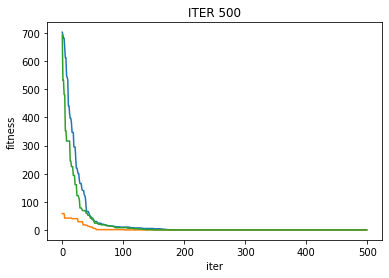

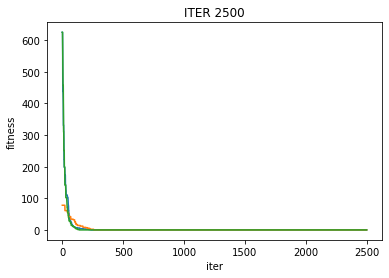

In [3]:
for run in range(RUNS):
    for kind in range(ITER_KINDS):

        ## Initial random variables, every algorithm has same initial
        arr = np.random.uniform(test.l_bound,test.u_bound, (AGENT_NUM, test.dim))

        #########   PSO   #########
        algo = PSO (dim=test.dim,num=AGENT_NUM,max_iter=ITER[kind], u_bound=test.u_bound, l_bound=test.l_bound, func=test.func)
        algo.pso_init(arr)
        algo.pso_iterator()

        # Resize the result to 2500
        tmp = algo.best_results.copy()
        tmp.resize(2500)
        RESULTS[0][run][kind] = tmp.copy()
        ###########################

        #########   GSA   #########
        algo = GSA (g_0 = G_0, dim=test.dim, num=AGENT_NUM, rate=ALPHA, k=K_best, max_iter=ITER[kind], u_bound=test.u_bound, l_bound=test.l_bound, func=test.func, end_thres=end_thres)
        algo.algorithm(arr)

        # Resize the result to 2500
        tmp = algo.best_results_so_far.copy()
        tmp.resize(2500)
        RESULTS[1][run][kind] = tmp.copy()
        ###########################

        #########   ABC   #########
        algo = ABC (dim=test.dim, num=AGENT_NUM, max_iter=ITER[kind], u_bound=test.u_bound, l_bound=test.l_bound, func=test.func)
        algo.abc_init(arr)
        algo.abc_iterator()

        # Resize the result to 2500
        tmp = algo.best_results.copy()
        tmp.resize(2500)
        RESULTS[2][run][kind] = tmp.copy()
        ###########################

for algo in range(ALGO):
    for kind in range(ITER_KINDS):

        average = np.zeros((ITER[1])) 
        for run in range(RUNS):

            average = average + RESULTS[algo][run][kind]
        AVERAGE_RESULT[algo][kind] = average / RUNS
plot_result()